# Turkish 2019 Elections in a perspective of Benford's Law with using Python

Let's see how Benford's Law can be used in Python and how it looks in Turkey 2019 local elections

### What is Benford’s Law?

Before starting lets explain a little bit Benford's Law. ref: <a href="https://en.wikipedia.org/wiki/Benford%27s_law" target="_blank">Wikipedia</a>

A better description at: <a href="https://brilliant.org/wiki/benfords-law/">Brilliant</a> thanks to, Patrick Corn, Hua Zhi Vee, Christopher Williams, E. Ross and J.Khim <br><b>Benford's law</b> is an observation about the leading digits of the numbers found in real-world data sets. Intuitively, one might expect that the leading digits of these numbers would be uniformly distributed so that each of the digits from 1 to 9 is equally likely to appear. In fact, it is often the case that 1 occurs more frequently than 2, 2 more frequently than 3, and so on. This observation is a simplified version of Benford's law. More precisely, the law gives a prediction of the frequency of leading digits using base-10 logarithms that predicts specific frequencies which decrease as the digits increase from 1 to 9.

<img src="rozklad_benforda.png" width=500 style="float:left;padding-left:20px">
<p>The distribution of first digits, according to Benford's law. Each bar represents a digit, and the height of the bar is the percentage of numbers that start with that digit.</p>
<p style="padding-right:20px">This phenomenon occurs generally in many different instances of real-world data. It becomes more pronounced and more likely when more data is combined together from different sources. Not every data set satisfies Benford's law, and it is surprisingly difficult to explain the law's occurrence in the data sets it does describe, but nevertheless it does occur consistently in well-understood circumstances. Scientists have even begun to use versions of the law to detect potential fraud in published data (tax returns, election results) that are expected to satisfy the law. </p>

In this study, we will look at how Benford's Law can be integrated into Python.
After making sure that the algorithm works correctly, we will analyze the results of the 2019 Local Elections in Turkey.

In [163]:
#importing Matplotlib a creating a dictionary for numbers with zero values.
#The dictionary will hold the numbers 1-9 and we will increment each number to analyze the ratios.

In [164]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from functools import reduce
import random

letters = {
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0
}

colours = ['#b0dfe5','#95C8D8','#73C2FB','#89cff0','#7285A5','#588BAE','#468284','#1c6e78','#4C516D']
#fibonacci series for testing
def iterativeFibIntoList(n):
    a, b = 0, 1
    l = []
    for i in range(n):
        a, b = b, a + b
        l.append(a)
    return l

list_of_nums = iterativeFibIntoList(1000)

for n in list_of_nums:
    first_digit = str(n)[0]
    letters[first_digit] += 1

In [165]:
x_fib = list(letters.keys())
y_fib = [round(val / 1000, 2) for val in letters.values()]

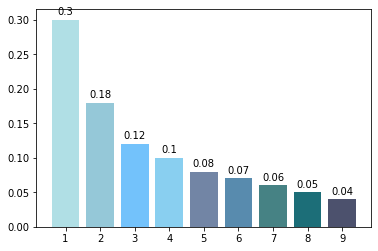

In [166]:
bars = plt.bar(x_fib, y_fib, color=colours)

for bar in bars:
    height = bar.get_height()

    plt.annotate(f'{height}',
        xy = (bar.get_x() + bar.get_width() / 2, height),
        xytext = (0, 3),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom'
    )

In [167]:
#Lets try an another example by creating an another series 
letters = {
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0
}

list_of_nums = map(lambda x: x+random.randint(1,100)*x, range(1,500))
list_of_nums = list(list_of_nums)
#print(list_of_nums)

for n in list_of_nums:
    first_digit = str(n)[0]
    letters[first_digit] += 1


In [168]:
x_rand = list(letters.keys())
y_rand = [round(val / 499, 2) for val in letters.values()]

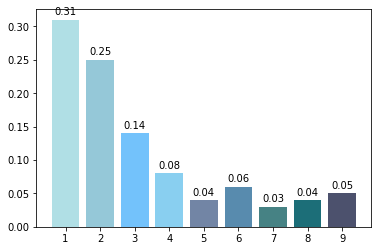

In [169]:
bars = plt.bar(x_rand, y_rand, color=colours)

for bar in bars:
    height = bar.get_height()

    plt.annotate(f'{height}',
        xy = (bar.get_x() + bar.get_width() / 2, height),
        xytext = (0, 3),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom'
    )

In [170]:
data = zip(x,y_fib,y_rand)

head = ["Number","Fibonacci Series", 'Random Series']

print(tabulate(data, headers=head, tablefmt="grid", floatfmt = ".2f"))


+----------+--------------------+-----------------+
|   Number |   Fibonacci Series |   Random Series |
+==========+====================+=================+
|        1 |               0.30 |            0.31 |
+----------+--------------------+-----------------+
|        2 |               0.18 |            0.25 |
+----------+--------------------+-----------------+
|        3 |               0.12 |            0.14 |
+----------+--------------------+-----------------+
|        4 |               0.10 |            0.08 |
+----------+--------------------+-----------------+
|        5 |               0.08 |            0.04 |
+----------+--------------------+-----------------+
|        6 |               0.07 |            0.06 |
+----------+--------------------+-----------------+
|        7 |               0.06 |            0.03 |
+----------+--------------------+-----------------+
|        8 |               0.05 |            0.04 |
+----------+--------------------+-----------------+
|        9 |

<b>Let's see how Benford's Law can be used in Python and how it looks in Turkey 2019 local elections</b>

Dataset is 2019_Istanbul.xlsx. You can download from github or from original site <a href="https://www.ysk.gov.tr/tr/31-mart-2019-mahalli-i%CC%87dareler-secimi/77916" target="_blank">YSK</a>

Dataset includes all cities and counties and their votes. There are two parties AK Parti and CHP.
In this study we are examining each parties votes count and their summaries with the Benford's Law


<img style="float:left;padding-right:20px" src="https://upload.wikimedia.org/wikipedia/tr/thumb/d/d5/Adalet_ve_Kalk%C4%B1nma_Partisi_logo.png/124px-Adalet_ve_Kalk%C4%B1nma_Partisi_logo.png" width="150"><p style="margin-top:100px;margin-left:30px">First we are looking to <b>AK Parti's</b> votes.</p>

In [171]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('2019_Turkey.xlsx', sheet_name='akp')#akp



votesNormal = {
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0
}

PartyVotes = df['PartyVotes'] 

for n in PartyVotes:
    first_digit = str(n)[0]
    votesNormal[first_digit] += 1
    
#looking to first 5 lines
print(df.tail(n=5))

    CityName CountyName PartyName  PartyVotes
799    DÜZCE   CUMAYERI  AK Parti        2657
800    DÜZCE    GÖLYAKA  AK Parti        3330
801    DÜZCE    ÇILIMLI  AK Parti        2288
802    DÜZCE   GÜMÜSOVA  AK Parti        2336
803    DÜZCE   KAYNASLI  AK Parti        2333


In [172]:
x_akp = list(votesNormal.keys())
y_akp = [round(val / len(PartyVotes), 2) for val in letters.values()]

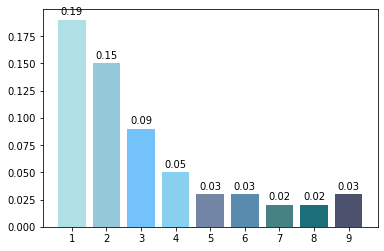

In [173]:
bars = plt.bar(x_akp, y_akp, color=colours)

for bar in bars:
    height = bar.get_height()

    plt.annotate(f'{height}',
        xy = (bar.get_x() + bar.get_width() / 2, height),
        xytext = (0, 3),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom'
    )

<hr>
<img style="float:left;padding-right:20px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Cumhuriyet_Halk_Partisi_Logo.svg/126px-Cumhuriyet_Halk_Partisi_Logo.svg.png" width="150"><p style="margin-top:50px">Now we are looking to <b>CHP's</b> votes.</p>

In [174]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('2019_Turkey.xlsx', sheet_name='chp')#chp



votesNormal = {
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0
}

PartyVotes = df['PartyVotes'] 

for n in PartyVotes:
    first_digit = str(n)[0]
    votesNormal[first_digit] += 1
    
#looking to first 5 lines
print(df.tail(n=5))

     CityName  CountyName PartyName  PartyVotes
509  OSMANIYE      DÜZIÇI       CHP       17133
510  OSMANIYE  TOPRAKKALE       CHP        1483
511     DÜZCE    AKÇAKOCA       CHP        3930
512     DÜZCE     YIGILCA       CHP         148
513     DÜZCE     GÖLYAKA       CHP        1045


In [175]:
x_chp = list(votesNormal.keys())
y_chp = [round(val / len(PartyVotes), 2) for val in letters.values()]

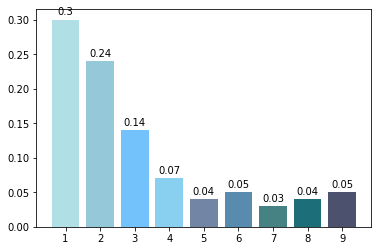

In [176]:
bars = plt.bar(x_chp, y_chp, color=colours)

for bar in bars:
    height = bar.get_height()

    plt.annotate(f'{height}',
        xy = (bar.get_x() + bar.get_width() / 2, height),
        xytext = (0, 3),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom'
    )

## Conclusion
<hr>

<b>As a result</b>, we can compare ratios and detect abnormalities in a perspective of Benford's Law.
Which looks normal in total.

In [177]:
data = zip(x,y_fib,y_rand,y_chp,y_akp)

head = ["Number","Fibonacci Series", 'Random Series', 'CHP', 'AK Parti']

print(tabulate(data, headers=head, tablefmt="grid", floatfmt = ".2f"))

+----------+--------------------+-----------------+-------+------------+
|   Number |   Fibonacci Series |   Random Series |   CHP |   AK Parti |
+==========+====================+=================+=======+============+
|        1 |               0.30 |            0.31 |  0.30 |       0.19 |
+----------+--------------------+-----------------+-------+------------+
|        2 |               0.18 |            0.25 |  0.24 |       0.15 |
+----------+--------------------+-----------------+-------+------------+
|        3 |               0.12 |            0.14 |  0.14 |       0.09 |
+----------+--------------------+-----------------+-------+------------+
|        4 |               0.10 |            0.08 |  0.07 |       0.05 |
+----------+--------------------+-----------------+-------+------------+
|        5 |               0.08 |            0.04 |  0.04 |       0.03 |
+----------+--------------------+-----------------+-------+------------+
|        6 |               0.07 |            0.06 |

<a href="https://www.linkedin.com/in/denizumutdereli/" target="_blank">@Deniz Umut Dereli</a>